In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [35]:
print("Archivos disponibles en el directorio actual:")
archivos_disponibles = [f for f in os.listdir() if f.endswith('.csv')]
for archivo in archivos_disponibles:
    print(f" - {archivo}")

Archivos disponibles en el directorio actual:
 - NBA_PBP_2017-18.csv
 - NBA_PBP_2019-20.csv
 - play_by_play.csv
 - player.csv
 - other_stats.csv
 - clutch_stats.csv
 - game_summary.csv
 - NBA_PBP_2016-17.csv
 - NBA_PBP_2018-19.csv
 - NBA_PBP_2020-21.csv
 - draft_history.csv
 - common_player_info.csv
 - NBA_PBP_2015-16.csv
 - game.csv


In [36]:
import os
import pandas as pd

# Ruta base (ajústala si no estás en la raíz del notebook)
base_path = "../TercerExamen"

# Filtrar archivos tipo NBA_PBP
archivos_pbp = sorted([
    f for f in os.listdir(base_path)
    if f.startswith("NBA_PBP_") and f.endswith(".csv")
])

# Leer cada archivo y mostrar estructura
for archivo in archivos_pbp:
    print(f"\n📄 Cargando archivo: {archivo}")
    try:
        df_sample = pd.read_csv(os.path.join(base_path, archivo), nrows=5)
        print("Columnas:")
        for col in df_sample.columns:
            print(f"  - {col}")
        print("Tipos de datos:")
        print(df_sample.dtypes)
        print("Primeras filas:")
        display(df_sample.head())
    except Exception as e:
        print(f"❌ Error al leer {archivo}: {e}")



📄 Cargando archivo: NBA_PBP_2015-16.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam  

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,720,DET,Jump ball: A. Drummond vs. A. Horford (E. lyas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A. Drummond - drumman01,A. Horford - horfoal01,E. İlyasova - ilyaser01
1,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,701,DET,A. Drummond misses 2-pt layup from 1 ft (block...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,699,DET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,697,DET,NaN,...,NaN,NaN,NaN,K. Bazemore - bazemke01,bad pass,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,681,DET,M. Morris makes 2-pt jump shot from 13 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📄 Cargando archivo: NBA_PBP_2016-17.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam  

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,720,NYK,Jump ball: J. Noah vs. T. Thompson (D. Rose ga...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - noahjo01,T. Thompson - thomptr01,D. Rose - rosede01
1,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,700,NYK,D. Rose makes 2-pt layup from 1 ft (assist by ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,686,NYK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,683,NYK,Defensive rebound by J. Noah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,676,NYK,C. Anthony misses 2-pt jump shot from 20 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📄 Cargando archivo: NBA_PBP_2017-18.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam  

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,720,BOS,Jump ball: K. Love vs. A. Horford (K. Irving g...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Love - loveke01,A. Horford - horfoal01,K. Irving - irvinky01
1,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,704,BOS,K. Irving makes 2-pt jump shot from 10 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,687,BOS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,683,BOS,Defensive rebound by A. Horford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,681,BOS,G. Hayward misses 3-pt jump shot from 25 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📄 Cargando archivo: NBA_PBP_2018-19.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam  

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,720,PHI,Jump ball: J. Embiid vs. A. Horford (B. Simmon...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Embiid - embiijo01,A. Horford - horfoal01,B. Simmons - simmobe01
1,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,R. Covington misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,675,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,673,PHI,Defensive rebound by D. ari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📄 Cargando archivo: NBA_PBP_2019-20.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
  - Unnamed: 40
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📄 Cargando archivo: NBA_PBP_2020-21.csv
Columnas:
  - URL
  - GameType
  - Location
  - Date
  - Time
  - WinningTeam
  - Quarter
  - SecLeft
  - AwayTeam
  - AwayPlay
  - AwayScore
  - HomeTeam
  - HomePlay
  - HomeScore
  - Shooter
  - ShotType
  - ShotOutcome
  - ShotDist
  - Assister
  - Blocker
  - FoulType
  - Fouler
  - Fouled
  - Rebounder
  - ReboundType
  - ViolationPlayer
  - ViolationType
  - TimeoutTeam
  - FreeThrowShooter
  - FreeThrowOutcome
  - FreeThrowNum
  - EnterGame
  - LeaveGame
  - TurnoverPlayer
  - TurnoverType
  - TurnoverCause
  - TurnoverCauser
  - JumpballAwayPlayer
  - JumpballHomePlayer
  - JumpballPoss
Tipos de datos:
URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam  

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/202012220BRK.html,regular,Barclays Center Brooklyn New York,December 22 2020,7:00 PM,BRK,1,720,GSW,Jump ball: J. Wiseman vs. D. Jordan (J. Harris...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Wiseman - wisemja01,D. Jordan - jordade01,J. Harris - harrijo01
1,/boxscores/202012220BRK.html,regular,Barclays Center Brooklyn New York,December 22 2020,7:00 PM,BRK,1,710,GSW,NaN,...,NaN,NaN,NaN,D. Jordan - jordade01,bad pass,NaN,NaN,NaN,NaN,NaN
2,/boxscores/202012220BRK.html,regular,Barclays Center Brooklyn New York,December 22 2020,7:00 PM,BRK,1,698,GSW,Shooting foul by K. Irving (drawn by S. Curry),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/202012220BRK.html,regular,Barclays Center Brooklyn New York,December 22 2020,7:00 PM,BRK,1,698,GSW,S. Curry makes free throw 1 of 2,...,1 of 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/202012220BRK.html,regular,Barclays Center Brooklyn New York,December 22 2020,7:00 PM,BRK,1,698,GSW,S. Curry makes free throw 2 of 2,...,2 of 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dataframes_pbp = {}
for archivo in archivos_pbp:
    temporada = archivo.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(os.path.join(base_path, archivo))
    dataframes_pbp[temporada] = df
    print(f"✔️ Cargado {archivo} → {df.shape[0]:,} filas")

✔️ Cargado NBA_PBP_2015-16.csv → 601,557 filas
✔️ Cargado NBA_PBP_2016-17.csv → 596,645 filas
✔️ Cargado NBA_PBP_2017-18.csv → 590,868 filas
✔️ Cargado NBA_PBP_2018-19.csv → 614,516 filas
✔️ Cargado NBA_PBP_2019-20.csv → 539,265 filas
✔️ Cargado NBA_PBP_2020-21.csv → 97,673 filas


Clutch
No Clutch    2894274
Clutch        146250
Name: count, dtype: int64


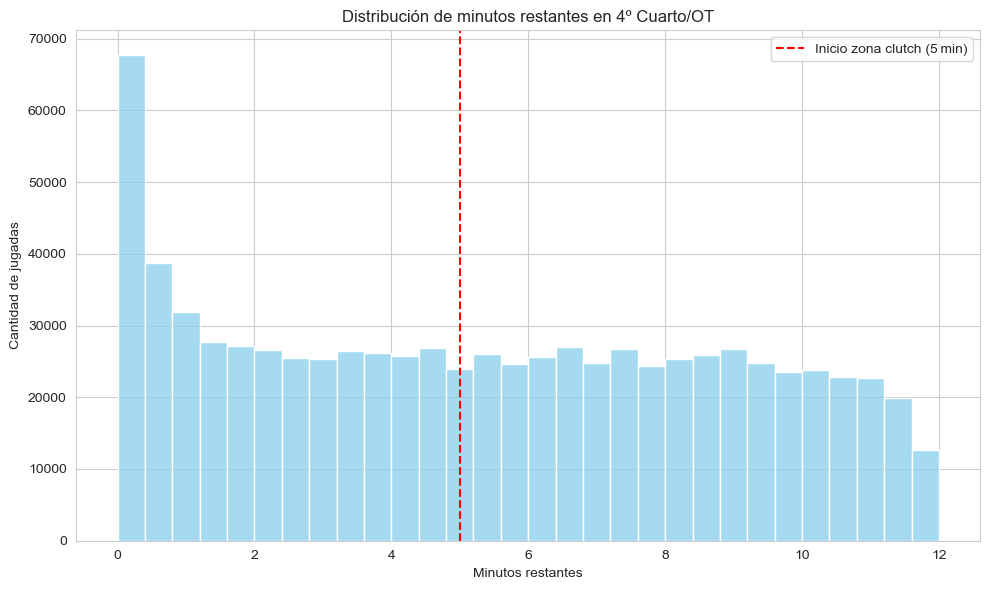

In [38]:
# 1) Unificar todos los DataFrames en uno solo:
df_all = pd.concat(dataframes_pbp.values(), ignore_index=True)

# 2) Convertir columnas relevantes a numérico (evitar strings que rompen los filtros):
df_all["Quarter"]   = pd.to_numeric(df_all["Quarter"],   errors="coerce")
df_all["SecLeft"]   = pd.to_numeric(df_all["SecLeft"],   errors="coerce")
df_all["HomeScore"] = pd.to_numeric(df_all["HomeScore"], errors="coerce")
df_all["AwayScore"] = pd.to_numeric(df_all["AwayScore"], errors="coerce")

# 3) Crear la columna booleana "Clutch" en df_all:
#    Marca como True todas las jugadas en ≥4º cuarto, ≤300 segundos restantes y diferencia de ≤5 ptos.
df_all["Clutch"] = (
    (df_all["Quarter"] >= 4) &
    (df_all["SecLeft"]   <= 300) &
    ((df_all["HomeScore"] - df_all["AwayScore"]).abs() <= 5)
)

# (Opcional) Mostrar cuántas jugadas son clutch vs no-clutch:
print(df_all["Clutch"].value_counts().rename({True: "Clutch", False: "No Clutch"}))

# 4) A partir de aquí ya puedes filtrar y graficar. Por ejemplo, para ver cuántas jugadas
#    hay en el 4º cuarto y tiempo extra (sin importar diferencia de puntos):
df_ultimos_cuartos = df_all[df_all["Quarter"] >= 4].copy()

# Ejemplo: histograma de minutos restantes en 4º cuarto y OT
df_ultimos_cuartos["MinLeft"] = df_ultimos_cuartos["SecLeft"] / 60
plt.figure(figsize=(10, 6))
sns.histplot(df_ultimos_cuartos["MinLeft"], bins=30, color="skyblue", kde=False)
plt.axvline(5, color="red", linestyle="--", label="Inicio zona clutch (5 min)")
plt.title("Distribución de minutos restantes en 4º Cuarto/OT")
plt.xlabel("Minutos restantes")
plt.ylabel("Cantidad de jugadas")
plt.legend()
plt.tight_layout()
plt.show()

# Y así sucesivamente con los demás gráficos (scatter de diferencia de puntos, pie chart de Clutch vs No-Clutch, etc.)


In [39]:
def extraer_jugadas_clutch(df):
    df = df.copy()

    # Filtrar último cuarto o tiempo extra
    df = df[df["Quarter"] >= 4]

    # Calcular la diferencia de puntos (score differential)
    df["ScoreDiff"] = (df["HomeScore"] - df["AwayScore"]).abs()

    # Filtrar jugadas en los últimos 5 minutos con marcador cerrado
    df_clutch = df[(df["SecLeft"] <= 300) & (df["ScoreDiff"] <= 5)]

    return df_clutch


/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


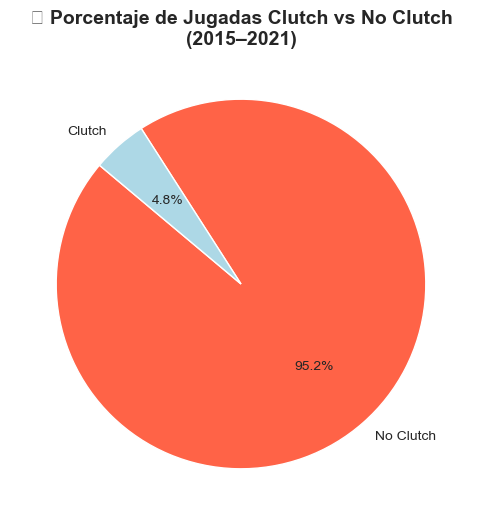

In [40]:
# Extraer jugadas clutch
df_clutch_all = extraer_jugadas_clutch(df_all)

# Crear una columna booleana
df_all["Clutch"] = ((df_all["Quarter"] >= 4) &
                    (df_all["SecLeft"] <= 300) &
                    ((df_all["HomeScore"] - df_all["AwayScore"]).abs() <= 5))

# Contar cuántas jugadas sí y cuántas no son clutch
clutch_counts = df_all["Clutch"].value_counts().rename({True: "Clutch", False: "No Clutch"})

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(clutch_counts, labels=clutch_counts.index, autopct="%1.1f%%", startangle=140, colors=["tomato", "lightblue"])
plt.title("🔍 Porcentaje de Jugadas Clutch vs No Clutch\n(2015–2021)", fontsize=14, fontweight="bold")
plt.show()


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_34517/1421855790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultimos_cuartos["MinLeft"] = df_ultimos_cuartos["SecLeft"] / 60
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_34517/1421855790.py:28: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


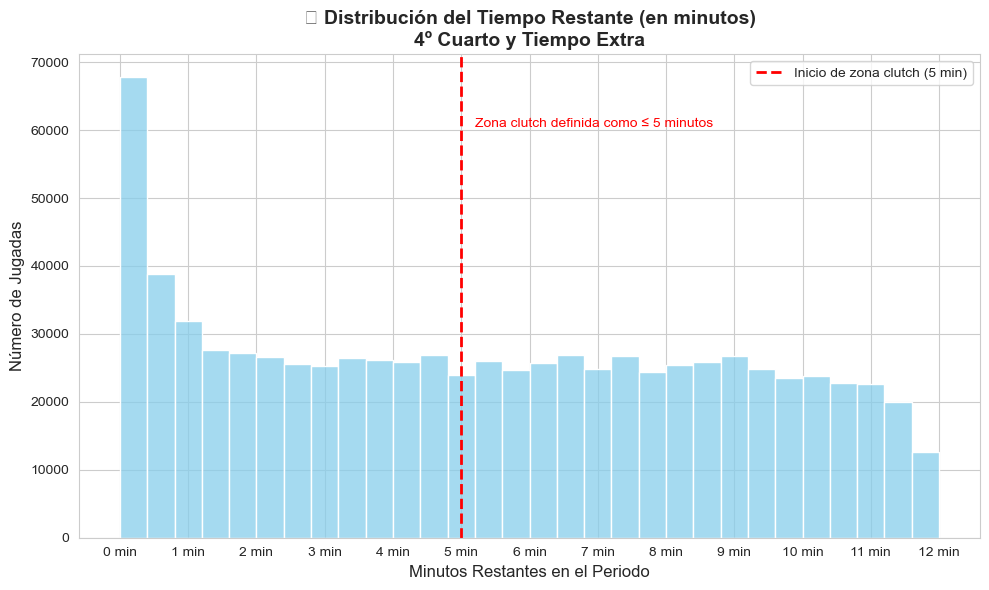

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unificar y filtrar jugadas del 4º cuarto y OT
df_all = pd.concat(dataframes_pbp.values())
df_ultimos_cuartos = df_all[df_all["Quarter"] >= 4]

# Convertir segundos a minutos para mejor lectura
df_ultimos_cuartos["MinLeft"] = df_ultimos_cuartos["SecLeft"] / 60

# Crear histograma del tiempo restante en minutos
plt.figure(figsize=(10, 6))
sns.histplot(df_ultimos_cuartos["MinLeft"], bins=30, kde=False, color="skyblue")

# Línea roja para la zona clutch (5 minutos)
plt.axvline(5, color="red", linestyle="--", linewidth=2, label="Inicio de zona clutch (5 min)")

# Títulos y ejes
plt.title("⏱ Distribución del Tiempo Restante (en minutos)\n4º Cuarto y Tiempo Extra", fontsize=14, fontweight="bold")
plt.xlabel("Minutos Restantes en el Periodo", fontsize=12)
plt.ylabel("Número de Jugadas", fontsize=12)

# Texto explicativo
plt.text(5.2, plt.ylim()[1]*0.85, "Zona clutch definida como ≤ 5 minutos", color="red", fontsize=10)
plt.xticks(ticks=range(0, 13), labels=[f"{i} min" for i in range(0, 13)])

plt.legend()
plt.tight_layout()
plt.show()


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_34517/3849230877.py:40: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


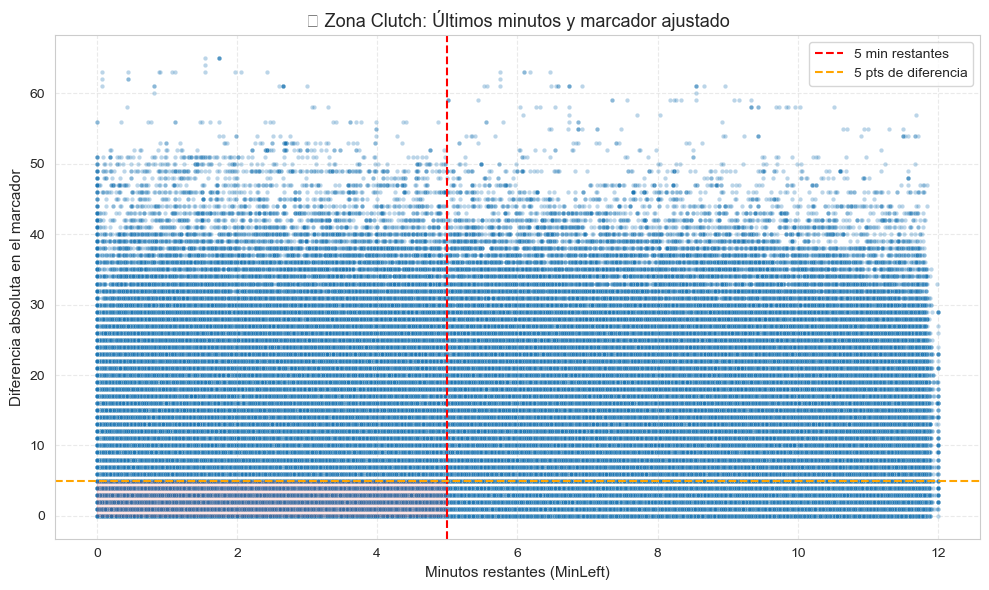

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Unir todos los datos
df_all = pd.concat(dataframes_pbp.values(), ignore_index=True)

# Convertir columnas necesarias
df_all["Quarter"] = pd.to_numeric(df_all["Quarter"], errors="coerce")
df_all["SecLeft"] = pd.to_numeric(df_all["SecLeft"], errors="coerce")
df_all["HomeScore"] = pd.to_numeric(df_all["HomeScore"], errors="coerce")
df_all["AwayScore"] = pd.to_numeric(df_all["AwayScore"], errors="coerce")

# Filtrar jugadas del 4º cuarto en adelante
df_4q = df_all[df_all["Quarter"] >= 4].copy()
df_4q["MinLeft"] = df_4q["SecLeft"] / 60
df_4q["ScoreDiff"] = (df_4q["HomeScore"] - df_4q["AwayScore"]).abs()

# Crear scatter plot sencillo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="MinLeft",
    y="ScoreDiff",
    data=df_4q,
    alpha=0.3,
    s=10
)

# Resaltar zona clutch: ≤ 5 minutos y ≤ 5 puntos de diferencia
plt.axvline(5, color="red", linestyle="--", label="5 min restantes")
plt.axhline(5, color="orange", linestyle="--", label="5 pts de diferencia")
plt.fill_betweenx(y=[0, 5], x1=0, x2=5, color="red", alpha=0.1)

# Estética y texto
plt.title("🎯 Zona Clutch: Últimos minutos y marcador ajustado", fontsize=13)
plt.xlabel("Minutos restantes (MinLeft)", fontsize=11)
plt.ylabel("Diferencia absoluta en el marcador", fontsize=11)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [43]:
# Número total de jugadas en Q4 y OT
total_jugadas = len(df_ultimos_cuartos)
print(f"🎯 Total de jugadas en el 4º cuarto y OT (todas las temporadas): {total_jugadas:,}")


🎯 Total de jugadas en el 4º cuarto y OT (todas las temporadas): 807,058


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_34517/2194438720.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


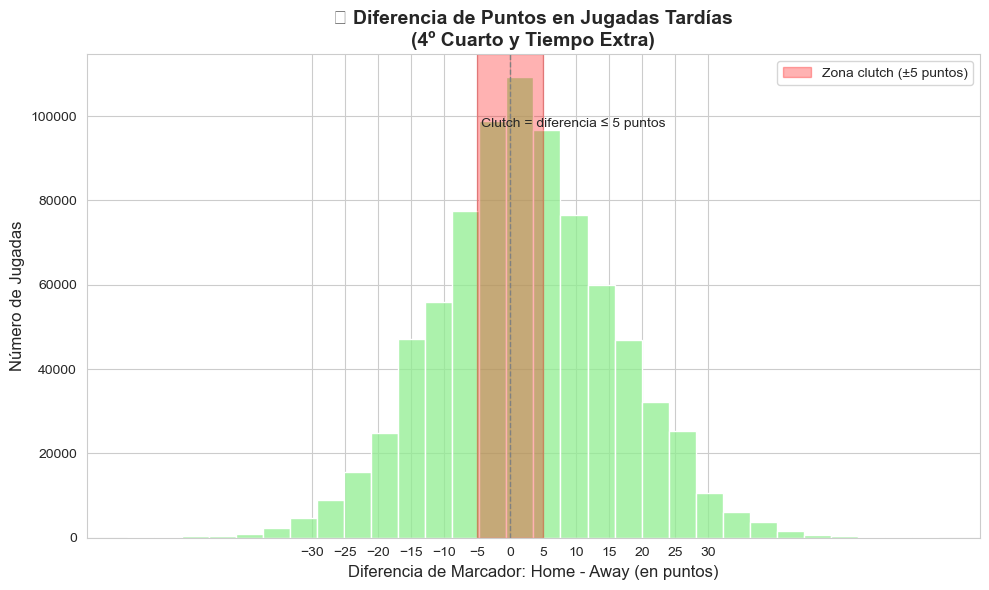

In [44]:
# Histograma de diferencia de puntos
plt.figure(figsize=(10, 6))
sns.histplot(df_ultimos_cuartos["HomeScore"] - df_ultimos_cuartos["AwayScore"], bins=30, color="lightgreen")

# Zona clutch resaltada (≤ 5 puntos)
plt.axvspan(-5, 5, color="red", alpha=0.3, label="Zona clutch (±5 puntos)")

# Títulos y ejes
plt.title("📉 Diferencia de Puntos en Jugadas Tardías\n(4º Cuarto y Tiempo Extra)", fontsize=14, fontweight="bold")
plt.xlabel("Diferencia de Marcador: Home - Away (en puntos)", fontsize=12)
plt.ylabel("Número de Jugadas", fontsize=12)

# Anotaciones y etiquetas claras
plt.text(-4.5, plt.ylim()[1]*0.85, "Clutch = diferencia ≤ 5 puntos", fontsize=10)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xticks(ticks=range(-30, 31, 5))

plt.legend()
plt.tight_layout()
plt.show()


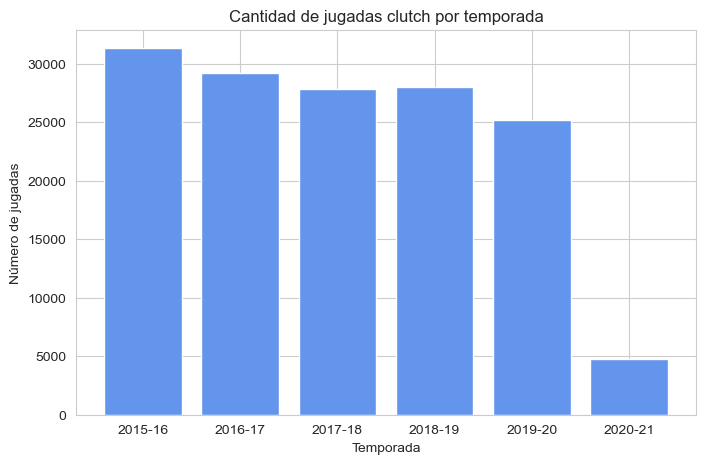

In [45]:
import matplotlib.pyplot as plt

cantidades = {t: len(df) for t, df in jugadas_clutch.items()}
plt.figure(figsize=(8, 5))
plt.bar(cantidades.keys(), cantidades.values(), color="cornflowerblue")
plt.title("Cantidad de jugadas clutch por temporada")
plt.ylabel("Número de jugadas")
plt.xlabel("Temporada")
plt.show()


In [46]:
def calcular_estadisticas_clutch(df):
    df_tiros = df[df["ShotOutcome"].notna() & df["Shooter"].notna()]
    resumen = (
        df_tiros.groupby("Shooter")["ShotOutcome"]
        .value_counts()
        .unstack(fill_value=0)
        .rename(columns={"make": "Encestados", "miss": "Fallados"})
    )
    resumen["Total"] = resumen["Encestados"] + resumen["Fallados"]
    resumen["Efectividad"] = resumen["Encestados"] / resumen["Total"]
    return resumen.sort_values("Encestados", ascending=False)


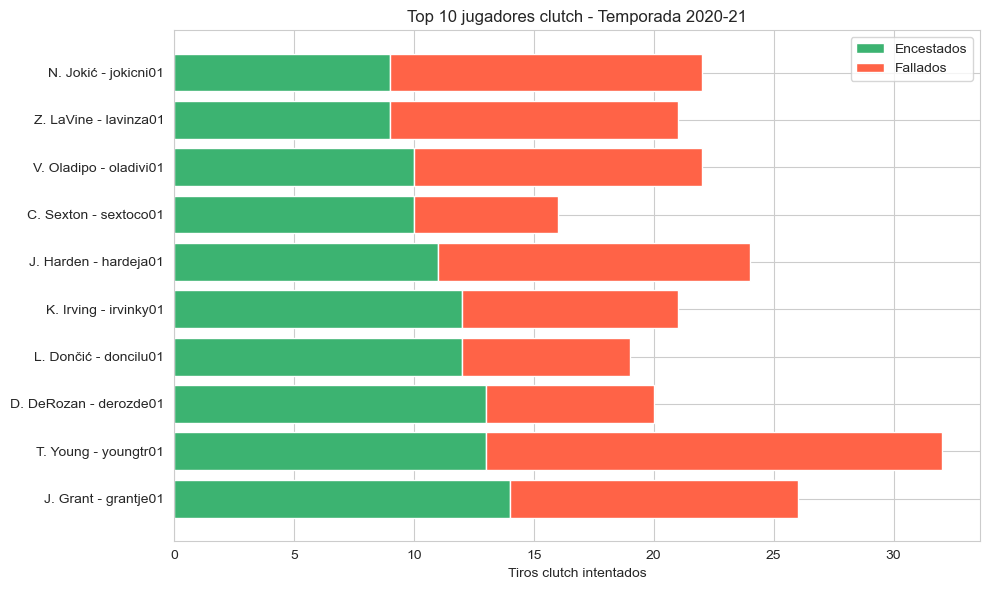

In [47]:
top = resumen_2021.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top.index[::-1], top["Encestados"], label="Encestados", color="mediumseagreen")
plt.barh(top.index[::-1], top["Fallados"], left=top["Encestados"], label="Fallados", color="tomato")
plt.xlabel("Tiros clutch intentados")
plt.title("Top 10 jugadores clutch - Temporada 2020-21")
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# 2) LISTAR ARCHIVOS CSV DISPONIBLES EN EL DIRECTORIO (para confirmar nombres y rutas)
csvs = [f for f in os.listdir() if f.endswith(".csv")]
print("Archivos CSV en carpeta:", csvs)

# Ejemplo de CSVs que podrías tener:
#  - NBA_PBP_2015.csv, NBA_PBP_2016.csv, …       (play-by-play)
#  - player.csv                                   (datos de cada jugador: nombre, posición, edad, equipo, altura, etc.)
#  - other_stats.csv                              (por ejemplo, salario, estadísticas avanzadas, PER, etc.)
#  - draft_history.csv                            (info de draft: pick, año, equipo que draftó, etc.)
#  - clutch_stats.csv                             (si ya tienes algún resumen precomputado de clutch)
#  - game_summary.csv / game.csv                  (resúmenes de cada juego: asistencias, rebotes, puntos totales, etc.)
#  - common_player.csv                            (quizá contenga ID’s estandarizados que conectan varios datasets)
#  - otros que uses: draft_history.csv, play_by_play.csv, player.csv, etc.

# 3) CARGAR DATASETS PRINCIPALES
# Ajusta 'ruta' si tus CSV están en subcarpetas
df_player = pd.read_csv("player.csv")  # Datos básicos de cada jugador
df_other_stats = pd.read_csv("other_stats.csv")  # Por ejemplo: salario, PER, WS, BPM, etc.
df_draft = pd.read_csv("draft_history.csv")  # Año, pick, equipo que lo seleccionó, etc.
if "clutch_stats.csv" in csvs:
    df_clutch_prep = pd.read_csv("clutch_stats.csv")  # Si tienes ya métricas clutch precomputadas

In [ ]:
#-------------------------------------------------------------------------------
# 4) PROCESAR PLAY‐BY‐PLAY: CALCULAR MÉTRICAS “CLUTCH” A NIVEL JUGADOR
#-------------------------------------------------------------------------------

# 4.1) Leer TODOS los CSV de play‐by‐play y concatenar en un solo DataFrame
pbp_files = sorted([f for f in csvs if f.startswith("NBA_PBP_")])
dataframes_pbp = {}
for f in pbp_files:
    temp = f.split("_")[-1].replace(".csv", "")
    dataframes_pbp[temp] = pd.read_csv(f)

# Unificar todas las temporadas en un solo DataFrame
df_pbp_all = pd.concat(dataframes_pbp.values(), ignore_index=True)

# 4.2) Asegurarse de que las columnas a usar sean numéricas:
for col in ["Quarter", "SecLeft", "HomeScore", "AwayScore"]:
    df_pbp_all[col] = pd.to_numeric(df_pbp_all[col], errors="coerce")

# 4.3) Definir “jugada clutch”: ≥4º cuarto, ≤ 5 minutos (300 seg) restantes, y diferencia de puntos ≤ 5
df_pbp_all["ScoreDiff"] = (df_pbp_all["HomeScore"] - df_pbp_all["AwayScore"]).abs()
df_pbp_all["IsClutch"]  = (
    (df_pbp_all["Quarter"] >= 4) &
    (df_pbp_all["SecLeft"]   <= 300) &
    (df_pbp_all["ScoreDiff"] <= 5)
)

In [ ]:
# 4.4) Filtrar SOLO las jugadas de tiro donde haya metido o fallado (para estadísticas de tiro clutch)
#       Suponemos que las columnas relevantes son “Shooter” (nombre o ID), “ShotOutcome” (make/miss)
df_shots       = df_pbp_all[df_pbp_all["ShotOutcome"].notna() & df_pbp_all["Shooter"].notna()].copy()
df_shots_clutch = df_shots[df_shots["IsClutch"] == True].copy()

# 4.5) Calcular métricas “clutch” a nivel jugador y temporada:
#       - Cantidad de intentos en clutch
#       - Cantidad de encestados y fallados
#       - Porcentaje de acierto clutch (FG% clutch)
#       - Puntos totales anotados en jugadas clutch
#       - Otras métricas que quieras (asistencias en clutch, robos, etc. si aparecen en columnas)

# Primero agrupamos por Shooter y Temporada
# (Asumimos que df_pbp_all tiene una columna “Season” o inferimos “Season” desde el nombre del archivo)
# Si no hay columna “Season”, puedes crearla:
def infer_season_from_row(row):
    # Ejemplo sencillo: si tu DataFrame final no trae season, hay que asignarla antes de concatenar
    return None

# Ejemplo suponer que df_shots_clutch trae “Season” ya en la tabla,
# si no, durante la concatenación pones df_pbp_all["Season"] = temporada correspondiente.

# Agrupar para sacar estadísticas básicas:
clutch_group = df_shots_clutch.groupby(["Season", "Shooter", "ShotOutcome"]).size().unstack(fill_value=0)
# Ahora “make” será la columna de encestados; “miss” la de fallados
clutch_group = clutch_group.rename(columns={"make": "Clutch_Made", "miss": "Clutch_Missed"})
clutch_group["Clutch_Attempts"] = clutch_group["Clutch_Made"] + clutch_group["Clutch_Missed"]
clutch_group["Clutch_FG_PCT"]  = (clutch_group["Clutch_Made"] / clutch_group["Clutch_Attempts"]).fillna(0)

# Suponiendo que cada “make” vale 2 o 3 puntos: si quieres calcular puntos clutch,
# necesitas saber ShotType o ShotPoints. Si no tienes, puedes simplemente contar “makes.”
# Por ejemplo, si tienes “ShotType” que indica “2PT” o “3PT”:
if "ShotType" in df_shots_clutch.columns:
    # Mapeo rápido: "2PT" → 2, "3PT" → 3
    df_shots_clutch["ShotValue"] = df_shots_clutch["ShotType"].map({"2PT":2, "3PT":3})
    pts_clutch = df_shots_clutch.groupby(["Season", "Shooter"])["ShotValue"].sum().rename("Clutch_Points")
    clutch_group = clutch_group.merge(pts_clutch, on=["Season", "Shooter"], how="left")
else:
    clutch_group["Clutch_Points"] = np.nan

clutch_group = clutch_group.reset_index()

In [ ]:
# 5) VISUALIZACIONES INICIALES DE MÉTRICAS “CLUTCH”
#-------------------------------------------------------------------------------

# 5.1) Distribución de intentos clutch (histograma de “Clutch_Attempts” por jugador)
plt.figure(figsize=(10,5))
sns.histplot(clutch_group["Clutch_Attempts"], bins=30, color="mediumpurple")
plt.title("Distribución de Intentos Clutch por Jugador (todas las temporadas)")
plt.xlabel("Intentos en situaciones clutch")
plt.ylabel("Número de jugadores")
plt.axvline(20, color="red", linestyle="--", label="≥ 20 intentos (umbral)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 5.2) Scatter plot: Relación entre intentos clutch y FG% clutch (solo quienes tienen ≥ N intentos)
min_intentos = 20
filtro = clutch_group["Clutch_Attempts"] >= min_intentos

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=clutch_group[filtro],
    x="Clutch_Attempts",
    y="Clutch_FG_PCT",
    hue="Season",
    alpha=0.7
)
plt.title(f"FG% Clutch vs Intentos Clutch (jugadores con ≥ {min_intentos} intentos)")
plt.xlabel("Intentos Clutch")
plt.ylabel("FG% Clutch")
plt.legend(bbox_to_anchor=(1,1), title="Season")
plt.tight_layout()
plt.show()


In [ ]:
# 5.3) Top‐10 jugadores por FG% clutch (en una temporada concreta)
temporada_elegida = "2021"
top10_fg_clutch = clutch_group[clutch_group["Season"] == temporada_elegida] \
                    .sort_values("Clutch_FG_PCT", ascending=False) \
                    .head(10)

plt.figure(figsize=(8,4))
sns.barplot(
    data=top10_fg_clutch,
    x="Clutch_FG_PCT",
    y="Shooter",
    palette="viridis"
)
plt.title(f"Top 10 FG% Clutch − Temporada {temporada_elegida}")
plt.xlabel("FG% Clutch")
plt.ylabel("Jugador")
plt.tight_layout()
plt.show()


In [ ]:
# 6) MERGEAR “CLUTCH_GROUP” CON OTROS ATRIBUTOS DE JUGADOR
#-------------------------------------------------------------------------------
# Primero vamos a unir la tabla clutch_group con df_player para obtener edad, posición, equipo, etc.

# 6.1) Normalizar llaves para hacer el merge (suponemos que “Shooter” es el mismo formato que df_player["PlayerName"])
#       Lo ideal es que ambas tablas usen un ID único (por ejemplo, NBA_ID). Si no, igualar por cadena de texto (pero ojo a discrepancias).
#       Aquí haremos un ejemplo simple:
df_player_filtered = df_player[["PlayerName", "PlayerID", "Pos", "Age", "Height", "Weight", "Team"]].copy()
df_player_filtered = df_player_filtered.rename(columns={"PlayerName": "Shooter"})

# Combinar:
df_clutch_enriched = clutch_group.merge(
    df_player_filtered,
    on="Shooter",
    how="left"
)

In [ ]:
# 6.2) Unir también con estadísticas de temporada (si están en “other_stats.csv”)
#       Por ejemplo, df_other_stats podría contener “PlayerID”, “Season”, “Salary”, “BPM”, “PER”, “PTS_per_game”, etc.
#       Asegúrate de que tenga la columna “Season” para hacer el merge en 3 columnas: (PlayerID, Season).
if "PlayerID" in df_other_stats.columns and "Season" in df_other_stats.columns:
    df_clutch_enriched = df_clutch_enriched.merge(
        df_other_stats,
        on=["PlayerID", "Season"],
        how="left"
    )

In [ ]:
# 6.3) Unir con draft history (opcional): edad de entrada, pick, etc.
if "PlayerID" in df_draft.columns:
    df_clutch_enriched = df_clutch_enriched.merge(
        df_draft[["PlayerID", "DraftYear", "DraftTeam", "OverallPick"]],
        on="PlayerID",
        how="left"
    )


In [ ]:

# 7) EXPLORAR VISUALMENTE LA RELACIÓN ENTRE MÉTRICAS CLUTCH Y “VALOR COMERCIAL”
#-------------------------------------------------------------------------------

# 7.1) Si “other_stats” incluye columna “Salary”:
if "Salary" in df_clutch_enriched.columns:
    # Scatter FG% Clutch vs Salary
    filtro2 = df_clutch_enriched["Clutch_Attempts"] >= 20  # jug. con suficientes intentos
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_clutch_enriched[filtro2],
        x="Clutch_FG_PCT",
        y="Salary",
        hue="Pos",
        alpha=0.7
    )
    plt.title("Relación FG% Clutch vs Salario (jugadores ≥20 intentos clutch)")
    plt.xlabel("FG% Clutch")
    plt.ylabel("Salario (USD)")
    plt.legend(bbox_to_anchor=(1, 1), title="Posición")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna 'Salary' para graficar contra métricas clutch.")

In [ ]:
# 7.2) Si tienes una medida de “Popularidad” o “Endorsements” en otro CSV, harías algo similar.
#       Ejemplo hipotético si hubiera “df_endorsements.csv” con (“PlayerID”, “Season”, “EndorsementEarnings”):
# df_endorse = pd.read_csv("endorsements.csv")
# df_clutch_enriched = df_clutch_enriched.merge(df_endorse, on=["PlayerID", "Season"], how="left")
# # Luego:
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     data=df_clutch_enriched[df_clutch_enriched["Clutch_Attempts"] >= 20],
#     x="Clutch_FG_PCT",
#     y="EndorsementEarnings",
#     hue="Pos",
#     alpha=0.7
# )
# plt.title("FG% Clutch vs Ingresos por Endorsements")
# plt.xlabel("FG% Clutch")
# plt.ylabel("Endrsements (USD)")
# plt.tight_layout()
# plt.show()

# 7.3) Heatmap de correlaciones
#      Podemos ver la correlación entre varias variables numéricas para entender qué tan fuerte está ligado el clutch al salario u otras métricas:
cols_corr = [
    "Clutch_Attempts",
    "Clutch_FG_PCT",
    "Clutch_Points"
]
if "Salary" in df_clutch_enriched.columns:
    cols_corr.append("Salary")
# Agrega otras columnas de interés: “PER”, “BPM”, “PTS_per_game”, etc., si existen
for extra in ["PER", "BPM", "PTS_per_game"]:
    if extra in df_clutch_enriched.columns:
        cols_corr.append(extra)

# Filtrar DataFrame solo con esas columnas y eliminar NaN
df_corr = df_clutch_enriched[cols_corr].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de calor de correlaciones (métricas clutch vs otros)")
plt.tight_layout()
plt.show()